In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gen=pd.read_csv(r'E:\kiet files\4 semister\csv files\titanic\gender_submission.csv')
train=pd.read_csv(r'E:\kiet files\4 semister\csv files\titanic\train.csv')
test=pd.read_csv(r'E:\kiet files\4 semister\csv files\titanic\test.csv')

In [3]:
gen.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train=train.merge(gen,on='PassengerId',how='left')

In [7]:
train.head(3)

,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived_x   891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Survived_y   0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 97.5+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived_x       0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived_y     891
dtype: int64

In [10]:
train['Cabin'].unique()
train[train['Cabin']=='nan'].count()

PassengerId    0
Survived_x     0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived_y     0
dtype: int64

In [11]:
train1=train.corr()
train1[['Survived_x']].sort_values(by='Survived_x')

,Survived_x
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
PassengerId,-0.005007
Parch,0.081629
Fare,0.257307
Survived_x,1.000000
Survived_y,NaN


In [12]:
train.columns

Index(['PassengerId', 'Survived_x', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_y'],
      dtype='object')

In [13]:
train['Survived_x'].value_counts()

0    549
1    342
Name: Survived_x, dtype: int64

In [14]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='Survived_x'>

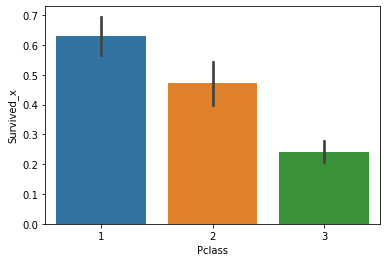

In [15]:
sns.barplot(x='Pclass',y='Survived_x',data=train)

In [16]:
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(strategy='median')
# imputer.fit(train)
# imputer.statistics_
# 
# x=imputer.transform(train)
# boston_tr=pd.DataFrame(x,columns=train.columns)

median=train['Age'].median()
train.fillna(median).head(2)

,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28.0,S,28.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,28.0


In [17]:
def gender(gend):
    if gend=='male':
        a=1
    else:
        a=0
    return a

In [18]:
def clas(cla):
    if cla=='S':
        a=1
    if cla=='C':
        a=2
    else:
        a=3
    return a
        

In [19]:
train['gender']=train['Sex'].apply(gender)

In [20]:
train['Port']=train['Embarked'].apply(clas)

In [21]:
train.head(2)

,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_y,gender,Port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,0,2


In [22]:
test['Port']=test['Embarked'].apply(clas)
test['gender']=test['Sex'].apply(gender)

In [23]:
train.drop('Sex',axis=1,inplace=True)
train.drop('Embarked',axis=1,inplace=True)
train.drop('Survived_y',axis=1,inplace=True)
train.drop('Cabin',axis=1,inplace=True)
train.drop('SibSp',axis=1,inplace=True)
train.drop('Parch',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)
train.drop('Name',axis=1,inplace=True)
train.columns

Index(['Survived_x', 'Pclass', 'Age', 'Ticket', 'Fare', 'gender', 'Port'], dtype='object')

In [24]:

train.head(2)

,Survived_x,Pclass,Age,Ticket,Fare,gender,Port
0,0,3,22.0,A/5 21171,7.2500,1,3
1,1,1,38.0,PC 17599,71.2833,0,2


In [25]:
train['Survived_x'].value_counts()

0    549
1    342
Name: Survived_x, dtype: int64

In [26]:
x=train[['Survived_x', 'Pclass', 'Age','Ticket', 'Fare','Port','gender']].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(x[0])):
    x[:,i]=le.fit_transform(x[:,i])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)
data_scaled = pd.DataFrame(x, columns=train.columns).astype(int)
data_scaled.head(2)

,Survived_x,Pclass,Age,Ticket,Fare,gender,Port
0,0,2,28,523,18,1,1
1,1,0,51,596,207,0,0


In [28]:
data_scaled['Ticket'].unique()

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
        95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
       507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
       239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
       553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
       304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
       428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
       254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
       463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
       203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
       573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
         5, 659,  90, 412, 488, 593, 169, 574, 629, 114, 271,  34, 459,
        11, 435, 386, 122, 227, 406, 604, 452, 494, 461, 160, 30

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived_x  891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   Ticket      891 non-null    object 
 4   Fare        891 non-null    float64
 5   gender      891 non-null    int64  
 6   Port        891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 88.0+ KB


In [30]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived_x  891 non-null    int32
 1   Pclass      891 non-null    int32
 2   Age         891 non-null    int32
 3   Ticket      891 non-null    int32
 4   Fare        891 non-null    int32
 5   gender      891 non-null    int32
 6   Port        891 non-null    int32
dtypes: int32(7)
memory usage: 24.5 KB


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data=data_scaled
X = data.drop('Survived_x',axis=1)  #independent columns
y = data[['Survived_x']]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

featureScores

print(featureScores.nlargest(10,'Score'))  #

    Specs        Score
3    Fare  4626.963717
2  Ticket  2871.655466
1     Age   150.210135
5    Port    92.702447
0  Pclass    54.465866
4  gender     4.755214


<ipython-input-32-dbb3df23703a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.0952916  0.18900599 0.2363428  0.18648674 0.01964807 0.27322479]


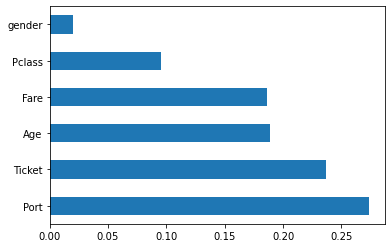

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
# neigh = KNeighborsClassifier(n_neighbors=3)

In [34]:
X = data.drop('Survived_x',axis=1)  #independent columns
y = data[['Survived_x']]    #target column i.e price range

In [35]:
#clas=LogisticRegression()
#clas= DecisionTreeClassifier(random_state=30,criterion='entropy')
clas= RandomForestClassifier(max_features='auto')
#clas= GaussianNB()
# clas= MultinomialNB()
#clas= XGBClassifier()
#clas= KNeighborsClassifier(n_neighbors=1)
# clas = svm.SVC(kernel='poly', C=1,gamma=1.0)
  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’

In [36]:

from sklearn.model_selection import train_test_split
        
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=33)

clas.fit(x_train,y_train)             
# for training fit is linear regre function

y_pred=clas.predict(x_test)      
# to predict values by giving different x values

<ipython-input-36-eb9fb97e4bc3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clas.fit(x_train,y_train)
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)
print()
print(cm)

0.8134328358208955

[[145  19]
 [ 31  73]]


In [38]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Port,gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3,0


In [39]:
PassengerId=test['PassengerId'].unique().tolist()

In [40]:
median=test['Age'].median()
test.fillna(median).head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Port,gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,27.0,Q,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,27.0,S,3,0


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Port         418 non-null    int64  
 12  gender       418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Port             0
gender           0
dtype: int64

In [43]:
test.drop('Sex',axis=1,inplace=True)
test.drop('Embarked',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
test.drop('SibSp',axis=1,inplace=True)
test.drop('Parch',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
test.columns

Index(['Pclass', 'Age', 'Ticket', 'Fare', 'Port', 'gender'], dtype='object')

In [44]:
x=test[[ 'Pclass', 'Age', 'Ticket', 'Fare','Port','gender']].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(x[0])):
    x[:,i]=le.fit_transform(x[:,i])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)
data_scaled = pd.DataFrame(x, columns=test.columns).astype(int)
data_scaled.head(2)

,Pclass,Age,Ticket,Fare,Port,gender
0,2,44,152,24,1,1
1,2,60,221,5,1,0


In [46]:
x_final=data_scaled.iloc[:,:].values

In [47]:
y_final=clas.predict(x_final)  

E:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
finaldt=pd.DataFrame()

In [49]:
finaldt['PassengerId']=PassengerId
finaldt['survived']=y_final

In [50]:
finaldt.head(2)

,PassengerId,survived
0,892,0
1,893,0


In [52]:
finaldt.to_csv('submission2.csv',index=False)